In [145]:
import perceval as pcvl
import numpy as np
import matplotlib.pyplot as plt
import itertools
from Functions import *
import matplotlib.pyplot as plt
import scipy as sc
from scipy import signal
from tabulate import tabulate
from dataRead import xpRead

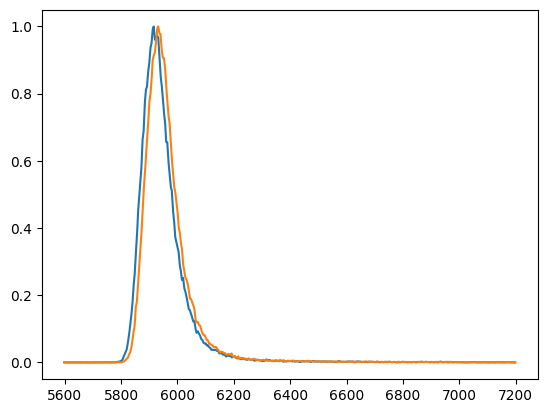

In [286]:
time, env1, env2,delay, table = xpRead('./acquired_data/xp_03/data.json')

extime = np.linspace(time[0],time[-1],100000,endpoint=False)

env1Interp = np.interp(extime,time,env1)
env2Interp = np.interp(extime,time,env2)
extime = extime[35000:45000]
env1Interp = env1Interp[35000:45000]
env2Interp = env2Interp[35000:45000]
plt.plot(extime,env1Interp)
plt.plot(extime,env2Interp)
idx1 = np.argmax(env1Interp)

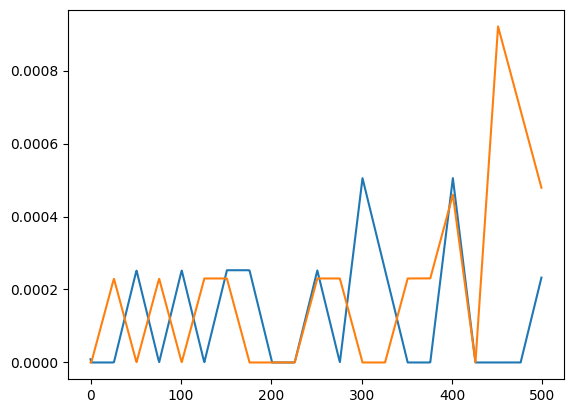

In [276]:
plt.plot(env1Interp[3500:4000])
plt.plot(env2Interp[3500:4000])

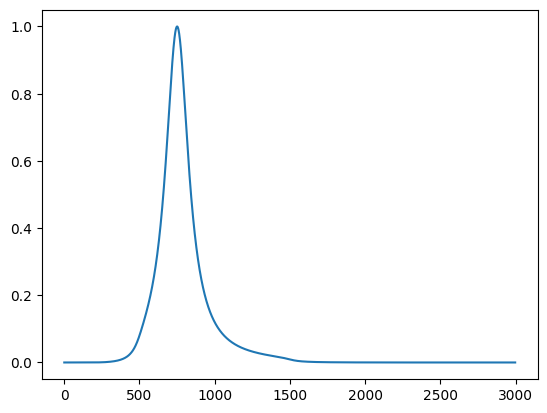

In [290]:
littleTime = np.linspace(0,200,1000,endpoint=False)
laserPulse1 = lorenztienne(littleTime,50,5)
laserPulse1 = laserPulse1/np.max(laserPulse1)
detector1 = lorenztienne(littleTime,50,9)
detector1 = detector1/np.max(detector1)
jitter1 = lorenztienne(littleTime,50,4.5)
jitter1 = jitter1/np.max(jitter1)

paddedLength = 10000
paddedlaserPulse1 = np.pad(laserPulse1,(0,paddedLength+len(extime)-len(littleTime)),'constant',constant_values=( 0))
paddeddetector1 = np.pad(detector1,(0,paddedLength+len(extime)-len(littleTime)),'constant',constant_values=( 0))
paddedjitter1 = np.pad(jitter1,(0,paddedLength+len(extime)-len(littleTime)),'constant',constant_values=( 0))
paddedenv1 = np.pad(env1Interp,(0,paddedLength),'constant',constant_values=( 0))

""" plt.plot(paddedlaserPulse1[0:50])
plt.plot(paddeddetector1[0:50])
plt.plot(paddedjitter1[0:50]) """

a = signal.convolve(laserPulse1,detector1,'full')
b = signal.convolve(a,jitter1,'full')
plt.plot(b/np.max(b))




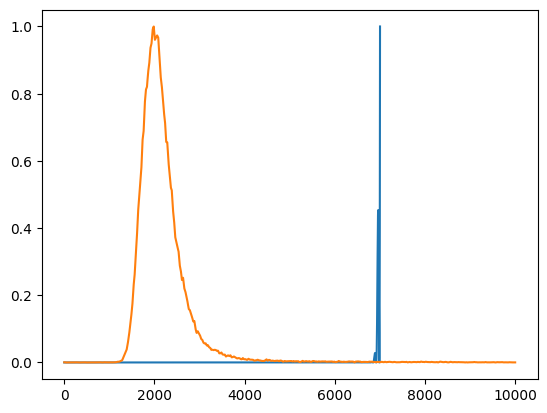

In [291]:
deconvolutedVal,_ = signal.deconvolve(env1Interp,b)

deconvolutedVal = deconvolutedVal**2

plt.plot((deconvolutedVal/np.max(deconvolutedVal)))
plt.plot(env1Interp)

In [266]:
print(np.min(deconvolutedVal))

-0.020067623976103212


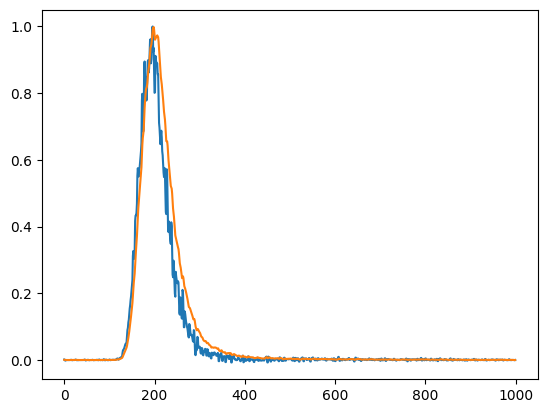

In [194]:
f_env1 = np.fft.rfft(paddedenv1)
f_laserPulse1 = np.fft.rfft(paddedlaserPulse1)
#f_detector1 = np.fft.rfft(paddeddetector1)
#f_jitter1 = np.fft.rfft(paddedjitter1)
r = f_env1 / (f_laserPulse1)

dk = np.fft.irfft(r)

plt.plot(dk[3500:4500]/np.max(dk))
plt.plot(env1Interp[3500:4500])

In [47]:
import numpy

h = [-8,-9,-3,-1,-6,7]
f = [-3,-6,-1,8,-6,3,-1,-9,-9,3,-2,5,2,-2,-7,-1]
g = [24,75,71,-34,3,22,-45,23,245,25,52,25,-67,-96,96,31,55,36,29,-43,-7]

# https://stackoverflow.com/questions/14267555/find-the-smallest-power-of-2-greater-than-n-in-python

def shift_bit_length(x):
    return 1<<(x-1).bit_length()

def conv(a, b):
    p = len(a)
    q = len(b)
    n = p + q - 1
    r = shift_bit_length(n)
    y = numpy.fft.ifft(numpy.fft.fft(a,r) * numpy.fft.fft(b,r),r)
    return numpy.trim_zeros(numpy.around(numpy.real(y),decimals=6))

def deconv(a, b):
    p = len(a)
    q = len(b)
    n = p - q + 1
    r = shift_bit_length(max(p, q))
    y = numpy.fft.ifft(numpy.fft.fft(a,r) / numpy.fft.fft(b,r), r)
    return numpy.trim_zeros(numpy.around(numpy.real(y),decimals=6))
    
# should return g
   
print(conv(h,f))

# should return h

print(deconv(g,f))

# should return f

print(deconv(g,h))

[ 24.  75.  71. -34.   3.  22. -45.  23. 245.  25.  52.  25. -67. -96.
  96.  31.  55.  36.  29. -43.  -7.]
[-8. -9. -3. -1. -6.  7.]
[-3. -6. -1.  8. -6.  3. -1. -9. -9.  3. -2.  5.  2. -2. -7. -1.]


In [181]:
time, env1, env2,delay, table = xpRead('./acquired_data/xp_03/data.json')

extime = np.linspace(time[0],time[-1],10000,endpoint=False)

env1Interp = np.interp(extime,time,env1)
env2Interp = np.interp(extime,time,env2)
extime = extime[3500:4500]
env1Interp = env1Interp[3500:4500]
env2Interp = env2Interp[3500:4500]
""" plt.plot(extime,env1Interp)
plt.plot(extime,env2Interp) """
idx1 = np.argmax(env1Interp)


littleTime = np.linspace(0,300,50,endpoint=False)
laserPulse = lorenztienne(littleTime,0,10)
laserPulse = laserPulse/np.max(laserPulse)
detector = lorenztienne(littleTime,0,18)
detector = detector/np.max(detector)
jitter = lorenztienne(littleTime,0,9)
jitter = jitter/np.max(jitter)

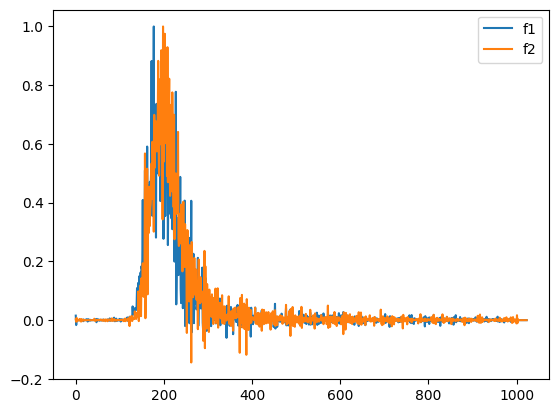

In [182]:
#f,_ = signal.deconvolve(env1Interp,laserPulse1)
hprime = conv(laserPulse,detector)
h = conv(hprime,jitter)
f1 = deconv(env1Interp,h)
f2 = deconv(env2Interp,h)
x = np.linspace(extime[0],extime[-1],len(f2))
f1 = f1/np.sqrt(Overlap(f1,f1,x))
f2 = f2/np.sqrt(Overlap(f2,f2,x))
plt.plot(f1/np.max(f1),label = 'f1')
plt.plot(f2/np.max(f2),label = 'f2')
""" plt.plot(env1Interp,label = 'real1')
plt.plot(env2Interp,label = 'real2') """

plt.legend()

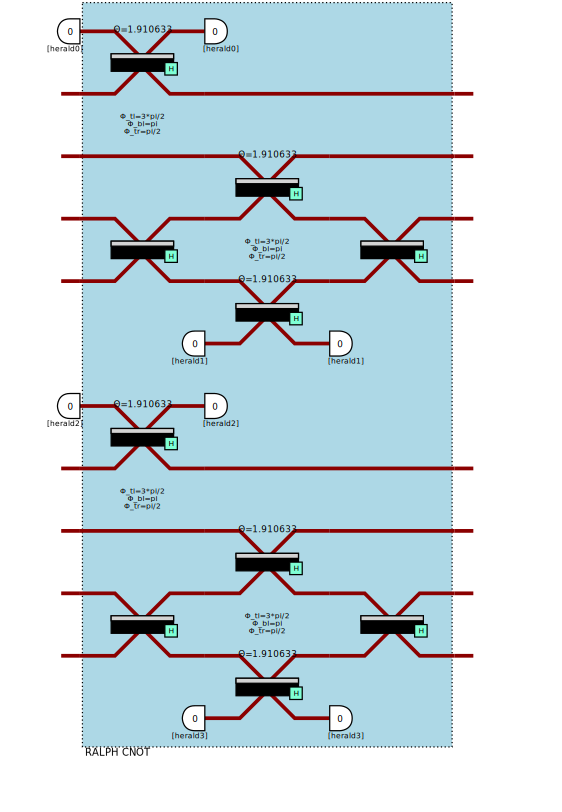

In [183]:
n = 3 #Nombre de modes spatiaux
m = 3 #Nombre de modes internes
k = 3 #Nombre de photon
cnot = pcvl.Circuit(12, name="Ralph CNOT")
cnot.add((0, 1), pcvl.BS.H(pcvl.BS.r_to_theta(1/3), phi_tl = -np.pi/2, phi_bl = np.pi, phi_tr = np.pi / 2))
cnot.add((3, 4), pcvl.BS.H())
cnot.add((2, 3), pcvl.BS.H(pcvl.BS.r_to_theta(1/3), phi_tl = -np.pi/2, phi_bl = np.pi, phi_tr = np.pi / 2))
cnot.add((4, 5), pcvl.BS.H(pcvl.BS.r_to_theta(1/3)))
cnot.add((3, 4), pcvl.BS.H())
#first copy
cnot.add((6, 7), pcvl.BS.H(pcvl.BS.r_to_theta(1/3), phi_tl = -np.pi/2, phi_bl = np.pi, phi_tr = np.pi / 2))
cnot.add((9, 10), pcvl.BS.H())
cnot.add((8, 9), pcvl.BS.H(pcvl.BS.r_to_theta(1/3), phi_tl = -np.pi/2, phi_bl = np.pi, phi_tr = np.pi / 2))
cnot.add((10, 11), pcvl.BS.H(pcvl.BS.r_to_theta(1/3)))
cnot.add((9, 10), pcvl.BS.H())

p = pcvl.Processor("Naive", cnot)
p.set_postprocess(lambda s: (s[1] or s[2] or s[7] or s[8]) and (s[3] or s[4] or s[9] or s[10]))
p.add_herald(0, 0)
p.add_herald(5, 0)
p.add_herald(6, 0)
p.add_herald(11, 0)

pcvl.pdisplay(p, recursive = True)




In [184]:
def create_CRand(i,coef):
    CRand = []
    RawInputs = []
    Expected = []
    if i==0:
        CRand.append(np.array([[1,0],[0,0],[np.sqrt(1-coef ** 2),coef],[0,0]])) #Input = [1,0,1,0] = 0,0 exp = 0,0
        RawInputs.append([1,0,1,0])
        Expected = [1,0,1,0]
    elif i==1:
        CRand.append(np.array([[1,0],[0,0],[0,0],[np.sqrt(1-coef ** 2),coef]])) #Input = [1,0,0,1] = 0,1 exp = 0,1
        RawInputs.append([1,0,0,1])
        Expected = [1,0,0,1]
    elif i==2:
        CRand.append(np.array([[0,0],[1,0],[np.sqrt(1-coef ** 2),coef],[0,0]])) #Input = [0,1,1,0] = 1,0 exp = 1,1
        RawInputs.append([0,1,1,0])
        Expected = [0,1,0,1]
    elif i==3:
        CRand.append(np.array([[0,0],[1,0],[0,0],[np.sqrt(1-coef ** 2),coef]])) #Input = [0,1,0,1] = 1,1 exp = 1,0
        RawInputs.append([0,1,0,1])
        Expected = [0,1,1,0]
    else :
        print('Epic Fail')
        return
    return CRand, np.squeeze(RawInputs), Expected

# Create the C manually because it is not yet implemented
statesdict = {
    pcvl.BasicState([1,0,1,0]) : "00",
    pcvl.BasicState([1,0,0,1]) : "01",
    pcvl.BasicState([0,1,1,0]) : "10",
    pcvl.BasicState([0,1,0,1]) : "11"
}

def create_inputs(enterFunc,Coefs,Dictionnary = None): 
    #enterFunc is the distribution in space of the entry in the system ex: [1,1]
    if any(np.array(enterFunc)>1):
        raise Exception('Cannot be more than 1 photon per spatial mode')
        
    internMode = np.sum(enterFunc)
    spatialMode = len(enterFunc)
    nbPhoton = np.sum(enterFunc)
    L = spatialMode*internMode 

    Inputs = []
    for x in itertools.combinations(range(L), nbPhoton) :
        inputsTemps = [1 if i in x else 0 for i in range(L)]
        Inputs.append(np.array(inputsTemps))
    
    realInputs = []

    for i in range(len(Inputs)):
        compare = np.zeros(spatialMode)
        for ii in range(0,L,spatialMode):
            compare += Inputs[i][ii:ii+spatialMode]

        if np.all(compare == enterFunc):
            realInputs.append(Inputs[i])
    #print(realInputs)
    c = []
    Arr = np.squeeze(Coefs)
    
    for i in range(len(realInputs)):
        ArrCond = np.array(realInputs[i]).reshape(internMode,spatialMode).T
        y = np.ma.masked_array(Arr, abs(ArrCond-1))
        c.append(np.prod(y))

    k = 0

    if isinstance(Dictionnary,dict) and len(Dictionnary)!=0:
        testdict = {}

        iterkeys = itertools.permutations(Dictionnary.keys(),2)
        iterval = itertools.permutations(Dictionnary.values(),2)
        for i,j in zip(iterkeys,iterval) :
            dictkey = '|' + i[0] + ',' + i[1] + '>'
            dictval = j[0] + j[1]
            testdict[dictkey] = pcvl.BasicState(dictval)
        for i in realInputs:
            nameOfState = str(pcvl.BasicState(i))
            if k == 0:
                InputsBS = testdict[nameOfState]
                
            else:
                InputsBS = InputsBS + testdict[nameOfState]

            k += 1
        #Add the coefficient in the state vector
        k = 0
        for state,amplitude in InputsBS.items():

            InputsBS[state] = amplitude*c[k]
            k+=1
        
        return InputsBS,testdict
    else:     
        for i in realInputs:
            if k == 0 :
                InputsBS = pcvl.BasicState(i)
            else :
                InputsBS = InputsBS + pcvl.BasicState(i)
            k += 1
        #Add the coefficient in the state vector
        k = 0
        for state,amplitude in InputsBS.items():

            InputsBS[state] = amplitude*c[k]
            k+=1
        
        return InputsBS


In [187]:
""" 
waves = np.c_[env1Interp/np.sqrt(Overlap(env1Interp,env1Interp,extime)),env2Interp/np.sqrt(Overlap(env2Interp,env2Interp,extime))].T
new_base,coeffsMGS = modified_Schmidt(waves,extime) """
waves = np.c_[f1,f2].T
new_base,coeffsMGS = modified_Schmidt(waves,x)
coeff = coeffsMGS[1,1]
print(coeffsMGS)

[[1.         0.        ]
 [0.89458639 0.44690284]]


In [188]:
TableValue = []

for vars in range(4):

    statesProb = dict.fromkeys(statesdict.keys(),0)


    
    [C,Inputs,Expected] = create_CRand(vars,coeff)
    InputsBS = create_inputs(Inputs,C)

    #print(InputsBS)


    pcvl.pdisplay(p, recursive = True)
    realOutput = {}
    for i in range(len(InputsBS)):
        miniState = InputsBS[i]
        #print(miniState,':',InputsBS[miniState])
        p.with_input(miniState)
        output = p.probs()['results']
        for ii in output.keys():
            if ii in realOutput.keys():
                realOutput[ii] = realOutput[ii] + output[ii] * abs(InputsBS[InputsBS[i]]) ** 2
            else:
                realOutput[ii] = output[ii] * abs(InputsBS[InputsBS[i]]) ** 2

    
    Prob = 0
    
    for states,val in zip(realOutput.keys(),realOutput.values()):
        ls = np.array(states)
        Cond = ls[0:4] + ls[4:]
        tempState = pcvl.BasicState(Cond)
        #print(tempState,val)
        if tempState in statesProb.keys():
            statesProb[tempState] += val

    results = {key: value / 1 for key, value in statesProb.items()}
    TableValue.append(results)

In [189]:
table = [[] for i in range(len(statesdict.keys())+1)]
table[0] = list(statesdict.values())
k = 1
for i in statesdict.keys():
    l = 0
    for j in statesdict.keys():
        if l==0:
            table[k].append(statesdict[i])

        table[k].append(TableValue[k-1][j])
        
        l += 1
    k += 1

from tabulate import tabulate
print(table[4])
print(tabulate(table,headers='firstrow',tablefmt="fancy_grid"))

with open('shiftlist.txt','w+') as f:
    f.writelines(str(x))
    f.writelines('\n')
    f.writelines(str(table))

['11', 0.0, 0.0, 0.8668519002350291, 0.13314809976497088]
╒════╤══════╤══════╤══════════╤══════════╕
│    │   00 │   01 │       10 │       11 │
╞════╪══════╪══════╪══════════╪══════════╡
│ 00 │    1 │    0 │ 0        │ 0        │
├────┼──────┼──────┼──────────┼──────────┤
│ 01 │    0 │    1 │ 0        │ 0        │
├────┼──────┼──────┼──────────┼──────────┤
│ 10 │    0 │    0 │ 0.133148 │ 0.866852 │
├────┼──────┼──────┼──────────┼──────────┤
│ 11 │    0 │    0 │ 0.866852 │ 0.133148 │
╘════╧══════╧══════╧══════════╧══════════╛
